In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.dataset import SIModel
from src.approx_bc import abc_rejection_sampler, abc_rejection_sampler2
import seaborn as sns
from scipy.stats import norm, lognorm
import matplotlib

In [16]:
np.exp(np.log(2))

2.0

In [17]:
dist1 = lognorm(s = 1, scale=np.exp(0))
dist2 = lognorm(s =1, scale = np.exp(np.log(2)))

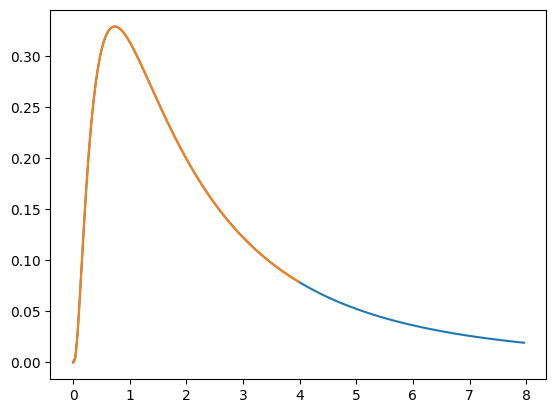

In [20]:
x = np.arange(0., 4, 0.02)

ax1 = sns.lineplot(x=x * 2, y=dist1.pdf(x) / 2)
ax2 = sns.lineplot(x=x, y=dist2.pdf(x))
# posterior_mean = np.exp(mu + sigma**2/2)
# plt.axvline(prior_mean, color="k", linestyle=":", label="Prior Mean")
# ax = sns.lineplot(x=x, y=lognorm.pdf(x, scale=np.exp(mu), s=sigma), label="Neural Posterior Density")
# plt.axvline(posterior_mean, color="k", label="Neural Posterior Mean")
# ax.set_xlabel(r"Infection Rate $\beta$")
# plt.legend()
# plt.savefig("images/crkp_homog.png")
plt.show()

it seems like scaling is a permissible operation! just have to be careful about how the mean might shift?

suppose we have a lognormal RV with mean m and sd s on the log scale

"scale" is exp(m)

multiply it by some scaling factor A

"scale" is A*exp(m) = exp (log A + m)

therefore the transformed RV is lognormal with mean m + logA and sd S on the log scale

this corresponds then to a lognormal RV with mean


### R_0

In [106]:
sns.set_theme()
sns.set_style("white")

matplotlib.rcParams['figure.figsize'] = (6.4, 4.8)

beta_true = [0.05, .1, .2, .3, .4, .5, 5]
alpha = 0.1
gamma = 0.05
heterogeneous = True
N = 1000 # consider increasing
T = 100
K = 30
data_seed = 31
prior_mu = [-3, -1.5, -1.5, -1.5, -1.5, -1.5, 1]
prior_sigma = [1, 1, 1, 1, 1, 1, 1]

In [160]:
0.05  + (.1 + .2 + .3 + .4 + .5) / 5 / 5 + 5 / 150

0.14333333333333334

my brain hurts dude

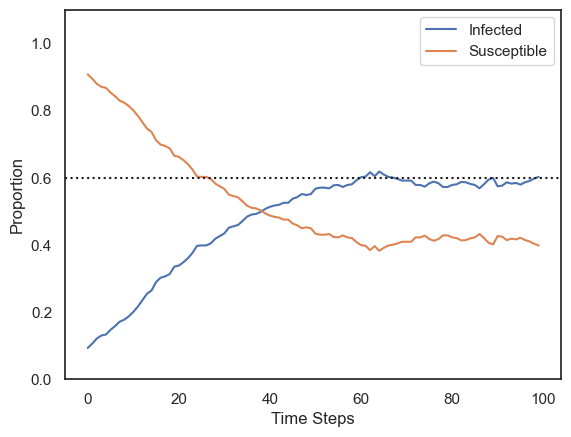

In [122]:
si_model = SIModel(alpha, gamma, beta_true, 
                    heterogeneous, prior_mu, prior_sigma,
                   N, T, summarize=False)

x_o_raw = si_model.get_observed_data(29)
I_o = np.array(x_o_raw)[0][:100]
S_o  = 1 - I_o
plt.plot(I_o, label="Infected")
plt.plot(S_o, label="Susceptible")
plt.legend(loc="upper right")
plt.xlabel("Time Steps")
plt.ylabel("Proportion")
plt.ylim(0, 1.1)
# plt.savefig("images/si-sim.png")
plt.axhline(0.6, color="k", linestyle=":")
plt.show()

In [62]:
100 * (beta_hat / 100 + gamma*alpha)

0.637

In [57]:
beta_hat = 0.137
r_0 = (beta_hat + gamma * alpha * N) / (gamma * (1 - alpha))
herd_immunity = 1 - 1/r_0
r_0, herd_immunity

(14.155555555555557, 0.9293563579277865)

In [54]:
# no turnover?

1 - (1/(beta_true * 52))

0.8717948717948718

## mind

In [161]:
cards = np.arange(1, 101)

In [163]:
np.random.choice(cards, 3)

array([29, 89, 75])

In [176]:
hand_size = 3
N = 2000
results = np.empty(N)
for i in range(N):
    draw = np.random.choice(cards, hand_size, replace=False)
    draw = np.sort(draw)
    diff = draw[1:] - draw[:-1]
    results[i] = diff.mean()
results.mean()

25.118

25.792

In [170]:
np.sort(draw)[1:] - np.sort(draw)[:-1]

array([54, 40])